# **Import Library**

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [2]:
filename = "Dataset_youtube_comments.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df.head()

,author,updated_at,like_count,text,public,language
0,@vitabivana,2024-02-05T01:28:57Z,0,"Belum selesai Mobil Listrik, sudah ada Mobil H...",True,id
1,@aliefromadhon5544,2024-02-04T09:20:20Z,0,nah ini permasalahan adalah kalau SPBU Hidroge...,True,id
2,@oholaoholiba6467,2024-02-04T03:39:01Z,0,jml bansos nya brp ð¤ udah tepat sasaran blom,True,id
3,@yantopomo,2024-02-04T01:35:12Z,0,kalau terbukti lebih murah pasti banyak yang p...,True,id
4,@HasanBabe-fu9cq,2024-02-04T00:47:00Z,0,Terus alternatif solar apa buð,True,id


In [3]:
df.drop(columns = ['author', 'updated_at', 'like_count', 'public', 'language'], inplace = True)
df.columns = ['text']
df.head()

,text
0,"Belum selesai Mobil Listrik, sudah ada Mobil H..."
1,nah ini permasalahan adalah kalau SPBU Hidroge...
2,jml bansos nya brp ð¤ udah tepat sasaran blom
3,kalau terbukti lebih murah pasti banyak yang p...
4,Terus alternatif solar apa buð


# **Preprocessing Data**

**Case Folding**

In [4]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['lower_text'] = df['text'].apply(lambda x: clean_text(x))

In [5]:
df

,text,lower_text
0,"Belum selesai Mobil Listrik, sudah ada Mobil H...",belum selesai mobil listrik sudah ada mobil h...
1,nah ini permasalahan adalah kalau SPBU Hidroge...,nah ini permasalahan adalah kalau spbu hidroge...
2,jml bansos nya brp ð¤ udah tepat sasaran blom,jml bansos nya brp udah tepat sasaran blom
3,kalau terbukti lebih murah pasti banyak yang p...,kalau terbukti lebih murah pasti banyak yang p...
4,Terus alternatif solar apa buð,terus alternatif solar apa bu
...,...,...
145,Ini untuk menjegal rencana industri kendaraan...,ini untuk menjegal rencana industri kendaraan...
146,Negara dg gurun pasir luas memiliki peluang SB...,negara dg gurun pasir luas memiliki peluang sb...
147,Di Indonesia masih ribut sama mobil listrikð...,di indonesia masih ribut sama mobil listrik ...
148,"Endingnya akan seperti mobil berbahan gas, cum...",endingnya akan seperti mobil berbahan gas cum...


**Normalisasi**

In [6]:
norm = {"jml"  :  "jumlah" , "brp"  :  "berapa" ,
        "dgn"  :  " dengan " ,  "gue" :  "saya" ,
        "tdk " : " tidak " ,  "blum" : "belum" ,
        "josss" : " bagus  " ,  "thanks" :  "terima kasih" ,
        "fast" : " cepat " ,  " dg " : " dengan " ,
        "trims" : " terima kasih " ,  "brg" : "barang" ,
        "gx" : " tidak " , "dgn" : "dengan" ,
        "good " : " bagus " , " utk " :  " untuk " ,
        "jg" : " juga " ,  " dkk " : " dan lainnya " ,
        "keduluan " : " lebih dulu " ,  "sdangkan" : "sedangkan" ,
        "mantaaap" : " bagus " ,  ' h '     : " hidrogen " ,
        "klu" : " kalau " ,  " pk " : " pak " ,
        " dn " : " dan " ,  "siiip" : " baik " ,
        "gantiin" : " menggantikan " , " wow " : " wah " ,
        "woow" : " wah " ,  " mending " : " lebih baik " ,
        "sabodo":" ", "teuing":" ",
        "urng":" ", "meuli" : "  " ,
        "bhan" : " bahan " ,
        " dr " : "dari" ,  "kndartaan" : "kendaraan" ,
        "yg" : " yang " ,  "segelintir" : " sebagian " ,
        "sdh" : " sudah " , "bnyk" : "banyak" ,
        "drpd " : " daripada " ,  "reasoning" : " dengan alasan " ,
        " yt" : " youtube " ,  " search " : " cari " ,
        "yaa" : "ya" ,  " lbh " : " lebih " ,
        " kaan " : " kan " ,  " but anyway " : " tapi " ,
        " turut " : " ikut " , " happy " : " bahagia " ,
        " pom " : " spbu " ,  " dstu " : " di situ " ,
        " itung " : " hitung " ,  "ngeliat" : " melihat " ,
        " donk " : " dong " ,  " klo " : " kalau " ,
        " muahal " : " mahal " ,  "waaah" : " wah " ,
        " bgt " : " sekali " , "siih" : " sih " ,
        "ev " : " kendaraan listrik " , " gua " : " saya " ,
        " memperumit " : " mempersulit " ,  " gw " : " saya " ,
        "coming soon" : " yang akan datang " ,  " bb " : " bahan bakar " ,
        " ga " : " tidak " ,  " jgn " : " jangan " ,
        "keseluruh" : " ke seluruh " , "baguss " : " bagus " ,
        "prodak" : " produk " ,  " knp " : " kenapa " ,
        " lo " : " kamu " ,  " gak " : " tidak " ,
        " us " : " united state " ,  " aja " : " saja " ,
        "msh" : " masih " , " smp " : " sampai " ,
        "naah" : " nah " , " nge charge " : " mengisi ulang " ,
        "negri" : " negeri " , " dr " : " dari " ,
        "berbahanbakar" : " berbahan bakar " ,  "do a" : " doa " ,
        " w " : " saya " ,  " yuk " : " ayo " ,
        "jjadi" : " jadi " ,  " mantep " : " bagus " ,
        " mahaaaalll " : " mahal " , " msih " : " masih " ,
        " sj " : " saja " ,  "nggak" : " tidak " ,
        "btul" : " betul " ,  "ngakak" : " lucu " ,
        "scalable" : " terukur " ,  " banget " : " sekali " ,
        "muahall" : " mahal " ,  " bingits " : " sekali " ,
        " udah " : " sudah " , " bener " : " benar " ,
        " sda " : " sumber daya alam " ,  " spt " : " seperti " ,
        "tong" : " tempat " ,  " g " : " tidak " ,
        "saing" : " sejajar " ,  " dlm " : " dalam " ,
        " mo " : " mau " ,  " crash " : " tabrakan " ,
        "tp" : " tapi " , " dr " : " dari " ,
        "blm" : "belum" ,  " cepet " : " cepat " ,
        "menjegal" : " menghalangi " , " sbg " : " sebagai " ,
        "transjakarta" : " trans jakarta " , " cuan " : " untung ",
        "bgmn" : " bagaimana ", "apakag" : "apakah",
        "mantaap" : " bagus ", "mantap": "bagus",
        "muahal" : " mahal ", "berteolak":"bertolak",
        "jd":"jadi", "yukk":"ayo",
        "cb":"coba", "mn":"mana",
        "hydrogen ":"hidrogen", "seantero ":"seluruh",
        "hisrogen ":"hidrogen", "hedrogenya ":"hidrogennya",
        "mobil ":" ", "jepang ":" ",
        "listrik ":" ", "baterai ":" "
        }



In [7]:
def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['lower_text'] = df['lower_text'].apply(lambda x: normalisasi(x))

In [8]:
#df['lower_text'].unique()

In [9]:
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")
df['clean_double_ws'] = df['lower_text'].apply(_normalize_whitespace)

In [10]:
df['clean_double_ws'].unique()

array(['belum selesai sudah ada hydrogen',
       'nah ini permasalahan adalah kalau spbu hidrogen dipegang oleh pertamina maka harga akan menjadi seperti bbm yang sekarang banyak drama mengenai subsidi energi lagi dan kalau pemerintah kekurangan dana maka akan semena mena dalam tarif',
       'jumlah bansos nya berapa sudah tepat sasaran blom',
       'kalau terbukti lebih murah pasti banyak yang pakai tapi katanya harga per kilometer nya bisa kali bbm dan untuk memproduksi hidrogen tetap perlu bbm itulah kenapa belum ada pesawat komersial bermesin hidrogen formula hidrogen juga belum ada kita tunggu saja insinyur menghasilkan inovasi produksi hidrogen yang jauh lebih murah dan ramah lingkungan sementara kita pakai avanza xenia dan lainnya yang bengkelnya ada seluruhnusantara atau mungkin sudah lebih dulu wuling byd cherry dan lainnya membanjiri nusantara dengan dan motor yang murah meriah',
       'terus alternatif solar apa bu',
       'apakah bbm hidrogen ini penemunya pak aryanto 

**Removing Stopwords**

In [11]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.6 MB/s eta 0:00:00


In [12]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ['jepang', 'listrik', 'baterai']

stop_words = StopWordRemoverFactory().get_stop_words()

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text


df['clean_sw'] = df['clean_double_ws'].apply(lambda x: stopword(x))
df.head()

,text,lower_text,clean_double_ws,clean_sw
0,"Belum selesai Mobil Listrik, sudah ada Mobil H...",belum selesai sudah ada hydrogen,belum selesai sudah ada hydrogen,selesai ada hydrogen
1,nah ini permasalahan adalah kalau SPBU Hidroge...,nah ini permasalahan adalah kalau spbu hidroge...,nah ini permasalahan adalah kalau spbu hidroge...,nah permasalahan kalau spbu hidrogen dipegang ...
2,jml bansos nya brp ð¤ udah tepat sasaran blom,jumlah bansos nya berapa sudah tepat sasa...,jumlah bansos nya berapa sudah tepat sasaran blom,jumlah bansos nya berapa tepat sasaran blom
3,kalau terbukti lebih murah pasti banyak yang p...,kalau terbukti lebih murah pasti banyak yang p...,kalau terbukti lebih murah pasti banyak yang p...,kalau terbukti lebih murah banyak pakai katany...
4,Terus alternatif solar apa buð,terus alternatif solar apa bu,terus alternatif solar apa bu,terus alternatif solar apa bu


**Tokenization**

In [13]:
tokenized = df['clean_sw'].apply(lambda x:x.split())
tokenized

0                               [selesai, ada, hydrogen]
1      [nah, permasalahan, kalau, spbu, hidrogen, dip...
2      [jumlah, bansos, nya, berapa, tepat, sasaran, ...
3      [kalau, terbukti, lebih, murah, banyak, pakai,...
4                    [terus, alternatif, solar, apa, bu]
                             ...                        
145    [untuk, menghalangi, rencana, industri, kendar...
146    [negara, gurun, pasir, luas, memiliki, peluang...
147                             [indonesia, ribut, sama]
148    [endingnya, seperti, berbahan, gas, cuma, dipa...
149    [indonesia, tetap, untung, teknologi, karena, ...
Name: clean_sw, Length: 150, dtype: object

**Stemming**

In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('databersih.csv', index=False)
data_clean = pd.read_csv('databersih.csv', encoding='latin1')
data_clean.head()

selesai ada hydrogen
nah masalah kalau spbu hidrogen pegang pertamina harga jadi bbm sekarang banyak drama kena subsidi energi dan kalau perintah kurang dana akan semena mena tarif
jumlah bansos nya berapa tepat sasar blom
kalau bukti lebih murah banyak pakai kata harga per kilometer nya kali bbm untuk produksi hidrogen tetap perlu bbm kenapa pesawat komersial mesin hidrogen formula hidrogen belum kita tunggu insinyur hasil inovasi produksi hidrogen jauh lebih murah ramah lingkung kita pakai avanza xenia lain bengkel ada seluruhnusantara mungkin lebih dulu wuling byd cherry lain banjir nusantara dan motor murah riah
terus alternatif solar apa bu
bbm hidrogen temu pak aryanto misel
negara segera cipta solusi cepat bbm ramah lingkung bisa distribusi tiap desa soal ecer bbm larang ini tolak belakang situasi kondisi jabat atas mungkin pernah rasa nama dorong motor kilo meter
lebih percaya hidrogensebagai green alternative
bagus moga indonesia impor minyak kurang defisit anggar apbn
bagus p

,clean_sw
0,selesai ada hydrogen
1,nah masalah kalau spbu hidrogen pegang pertami...
2,jumlah bansos nya berapa tepat sasar blom
3,kalau bukti lebih murah banyak pakai kata harg...
4,terus alternatif solar apa bu


In [15]:
df.duplicated().sum()

2

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

##**Translate**

In [19]:
!pip install translate

In [20]:
df = pd.read_csv("databersih.csv", encoding = 'latin-1')
df.head()

,clean_sw
0,selesai ada hydrogen
1,nah masalah kalau spbu hidrogen pegang pertami...
2,jumlah bansos nya berapa tepat sasar blom
3,kalau bukti lebih murah banyak pakai kata harg...
4,terus alternatif solar apa bu


In [21]:
from translate import Translator

def convert_eng(comment):
  translator = Translator(to_lang="en", from_lang="id")
  translation = translator.translate(comment)
  return translation

df["comment_en"] = df["clean_sw"].apply(convert_eng)
df.to_csv('data_terjemahan.csv', index=False)

##**Labeling**

In [22]:
data = pd.read_csv('data_terjemahan.csv')
data

,clean_sw,comment_en
0,selesai ada hydrogen,done there is hydrogen
1,nah masalah kalau spbu hidrogen pegang pertami...,well the problem is if the hydrogen SPBU holds...
2,jumlah bansos nya berapa tepat sasar blom,the number of bansos is how precise is the tar...
3,kalau bukti lebih murah banyak pakai kata harg...,if the evidence is cheaper to use the word pri...
4,terus alternatif solar apa bu,directly what solar alternative ma'am
...,...,...
145,untuk halang rencana industri kendara indonesia,to prevent the Indonesian vehicle industry plan
146,negara gurun pasir luas milik peluang produsen...,vast desert country belonging to green energy ...
147,indonesia ribut sama,indonesia the same storm
148,endingnya seperti bahan gas cuma pakai bagi an...,the ending is like gas material only used for ...


In [23]:
!pip install tweet_preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [24]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
comments = list(data['comment_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, comment in enumerate(comments):
  analysis = TextBlob(comment)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
    total_positif += 1
    status.append('Positif')
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append('Netral')
  else:
    total_negatif += 1
    status.append('Negatif')

  total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 81
Netral = 52
Negatif = 17

Total Data : 150


In [26]:
data['klasifikasi_blob'] = status
data

,clean_sw,comment_en,klasifikasi_blob
0,selesai ada hydrogen,done there is hydrogen,Netral
1,nah masalah kalau spbu hidrogen pegang pertami...,well the problem is if the hydrogen SPBU holds...,Positif
2,jumlah bansos nya berapa tepat sasar blom,the number of bansos is how precise is the tar...,Positif
3,kalau bukti lebih murah banyak pakai kata harg...,if the evidence is cheaper to use the word pri...,Positif
4,terus alternatif solar apa bu,directly what solar alternative ma'am,Positif
...,...,...,...
145,untuk halang rencana industri kendara indonesia,to prevent the Indonesian vehicle industry plan,Netral
146,negara gurun pasir luas milik peluang produsen...,vast desert country belonging to green energy ...,Negatif
147,indonesia ribut sama,indonesia the same storm,Netral
148,endingnya seperti bahan gas cuma pakai bagi an...,the ending is like gas material only used for ...,Negatif


## Visualisasi (NLP)

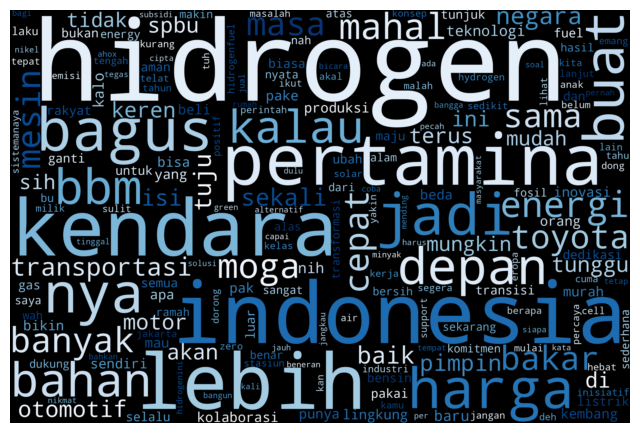

In [27]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(8,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([comments for comments in data['clean_sw']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

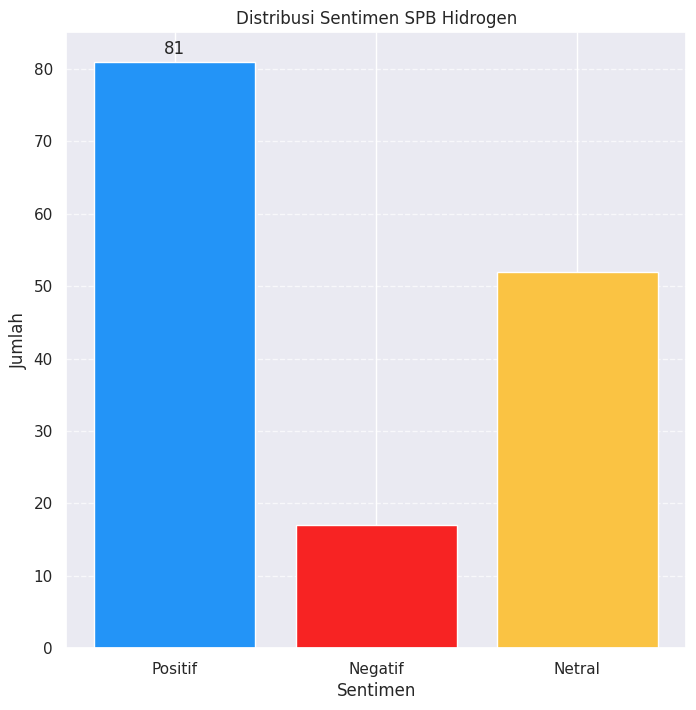

In [28]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8,8))
  bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen SPB Hidrogen")


## Klasifikasi Sentimen

In [29]:
data

,clean_sw,comment_en,klasifikasi_blob
0,selesai ada hydrogen,done there is hydrogen,Netral
1,nah masalah kalau spbu hidrogen pegang pertami...,well the problem is if the hydrogen SPBU holds...,Positif
2,jumlah bansos nya berapa tepat sasar blom,the number of bansos is how precise is the tar...,Positif
3,kalau bukti lebih murah banyak pakai kata harg...,if the evidence is cheaper to use the word pri...,Positif
4,terus alternatif solar apa bu,directly what solar alternative ma'am,Positif
...,...,...,...
145,untuk halang rencana industri kendara indonesia,to prevent the Indonesian vehicle industry plan,Netral
146,negara gurun pasir luas milik peluang produsen...,vast desert country belonging to green energy ...,Negatif
147,indonesia ribut sama,indonesia the same storm,Netral
148,endingnya seperti bahan gas cuma pakai bagi an...,the ending is like gas material only used for ...,Negatif


In [30]:
dataset = data.drop(['clean_sw'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [31]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
  if(n[1] == 'Positif'):
    set_positif.append(n)
  elif(n[1] == 'Negatif'):
    set_negatif.append(n)
  else:
    set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
  train_set.append(n)


In [32]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akurasi Tes: ", cl.accuracy(dataset))

Akurasi Tes:  0.7066666666666667


In [33]:
#Labeling
comments = list(data['comment_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, comment in enumerate(comments):
  analysis = TextBlob(comment, classifier=cl)

  if analysis.sentiment.polarity > 0.0:
    total_positif += 1
    status.append('Positif')
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append('Netral')
  else:
    total_negatif += 1
    status.append('Negatif')

  total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 81
Netral = 52
Negatif = 17

Total Data : 150


In [34]:
status = pd.DataFrame({"Klasifikasi Bayes": status})
data['klasifikasi_bayes'] = status

In [35]:
data

,clean_sw,comment_en,klasifikasi_blob,klasifikasi_bayes
0,selesai ada hydrogen,done there is hydrogen,Netral,Netral
1,nah masalah kalau spbu hidrogen pegang pertami...,well the problem is if the hydrogen SPBU holds...,Positif,Positif
2,jumlah bansos nya berapa tepat sasar blom,the number of bansos is how precise is the tar...,Positif,Positif
3,kalau bukti lebih murah banyak pakai kata harg...,if the evidence is cheaper to use the word pri...,Positif,Positif
4,terus alternatif solar apa bu,directly what solar alternative ma'am,Positif,Positif
...,...,...,...,...
145,untuk halang rencana industri kendara indonesia,to prevent the Indonesian vehicle industry plan,Netral,Netral
146,negara gurun pasir luas milik peluang produsen...,vast desert country belonging to green energy ...,Negatif,Negatif
147,indonesia ribut sama,indonesia the same storm,Netral,Netral
148,endingnya seperti bahan gas cuma pakai bagi an...,the ending is like gas material only used for ...,Negatif,Negatif


In [36]:
data.to_csv('data_analisis.csv', index=False)